In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from torch import nn
from torch import optim
from torch.autograd import Variable
from torch import Tensor
import torch
import traceback 
import sys
import pdb

/home/max/anaconda3/envs/fastai-cpu/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
PATH = Path('../data/mnist_kaggle/')
IMG_SIZE = 28

In [4]:
[x for x in PATH.iterdir()]

[PosixPath('../data/mnist_kaggle/test.csv'),
 PosixPath('../data/mnist_kaggle/mnist'),
 PosixPath('../data/mnist_kaggle/sample_submission.csv'),
 PosixPath('../data/mnist_kaggle/train.csv')]

In [5]:
test_x = pd.read_csv(filepath_or_buffer=PATH/'test.csv')
test_x.shape

(28000, 784)

In [6]:
train = pd.read_csv(filepath_or_buffer=PATH/'train.csv')
train.shape

(42000, 785)

In [97]:
train_y = train.label.as_matrix()
train_x = train.drop(columns=['label'], axis=1).as_matrix()
train_x.shape, train_y.shape

/home/max/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/max/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


((42000, 784), (42000,))

In [8]:
mean = train_x.mean()
std = train_x.std()
train_x = (train_x - mean)/std
train_x.mean(), train_x.std()

(9.77358783474097e-17, 1.0000000000000095)

In [9]:
img_arr = np.asarray(train_x); img_arr.shape

(42000, 784)

In [10]:
img = np.reshape(img_arr, (-1, IMG_SIZE, IMG_SIZE)); img.shape

(42000, 28, 28)

In [63]:
def show_img(img, title=""):
    plt.imshow(img, cmap="gray")
    plt.title(title)

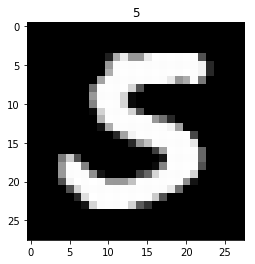

In [12]:
show_img(img[99], train_y[99])

In [112]:
model = nn.Sequential(
    nn.Linear(IMG_SIZE * IMG_SIZE, 100),
    nn.ReLU(),
    nn.Linear(100, 10),
    nn.LogSoftmax()
)

In [113]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-3)

In [114]:
criterion = nn.NLLLoss()

In [115]:
n_epoch = 10
n_samples = train_x.T[1].size; n_samples
def fit():
    for epoch in range(n_epoch):
        running_loss = 0.0
        for sample in range(n_samples):                                    
            x = Variable(torch.from_numpy(train_x[sample])).float()
            y = Variable(torch.from_numpy(np.array(train_y[sample]))).type(torch.LongTensor)
            
            x = x.view(1, -1)
            y = y.view(1, -1)
    
            optimizer.zero_grad()

            outputs = model(x)                
            loss = criterion(outputs, y)                        
            loss.backward()
            optimizer.step()

            #running_loss += loss.item()
            #if i % 100 == 0:
            #    print('[%d, %5d] loss: %.3f' %
            #          (epoch + 1, i + 1, running_loss / 100))
            #    running_loss = 0.0
    print('Finished Training')
        

In [116]:
try:
    fit()
except:
    extype, value, tb = sys.exc_info()
    traceback.print_exc()
    pdb.post_mortem(tb)

/home/max/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/torch/nn/modules/container.py:67: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Finished Training


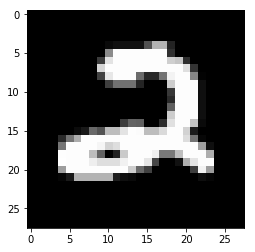

In [69]:
test_img = np.reshape(np.array(test_x.iloc[0]), (-1, IMG_SIZE, IMG_SIZE))
#test_img.shape
show_img(test_img[0])

In [145]:
def argmax(vec):
    return int(torch.max(outputs, 0)[1])    

In [147]:
test_x.fillna(0, inplace=True)
test_x.head(1)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.030075,-0.020243,-0.015459,-0.009334,-0.008094,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.030075,-0.020243,-0.015459,-0.009334,-0.008094,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.030075,-0.020243,-0.015459,-0.009334,-0.008094,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.030075,-0.020243,-0.015459,-0.009334,-0.008094,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.030075,-0.020243,-0.015459,-0.009334,-0.008094,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.030075,-0.020243,-0.015459,-0.009334,-0.008094,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.030075,-0.020243,-0.015459,-0.009334,-0.008094,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.030075,-0.020243,-0.015459,-0.009334,-0.008094,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.030075,-0.020243,-0.015459,-0.009334,-0.008094,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.030075,-0.020243,-0.015459,-0.009334,-0.008094,0.0,0.0,0.0,0.0,0.0


In [107]:
x = Variable(torch.from_numpy(np.array(test_x.iloc[0]))).float()

In [117]:
outputs = model(x); outputs

/home/max/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/torch/nn/modules/container.py:67: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Variable containing:
-2.7274e+01
-2.9539e+01
-7.9547e-09
-2.3937e+01
-3.0302e+01
-3.1179e+01
-2.8559e+01
-1.8655e+01
-3.1151e+01
-2.9437e+01
[torch.FloatTensor of size 10]

In [146]:
argmax(outputs)

2

In [154]:
result = []

In [155]:
n_samples = test_x.T.iloc[0].size; n_samples

28000

In [159]:
for sample in range(n_samples):
    x = Variable(torch.from_numpy(np.array(test_x.iloc[sample]))).float()
    outputs = model(x);
    y = argmax(outputs)
    result.append(y)

/home/max/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/torch/nn/modules/container.py:67: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [161]:
df = pd.DataFrame(columns=['Label'], data=result)

In [165]:
df.index += 1 

In [168]:
df.to_csv('submission.csv', index_label='ImageId')